In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

org = cv.imread('spideyS1.jpg', 0)

img_float32 = np.float32(org)

dft=cv.dft(img_float32,flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

cv.imshow("original", org)
cv.imshow("Magnitude spectrum", magnitude_spectrum)
cv.waitKey(0) 
cv.destroyAllWindows()

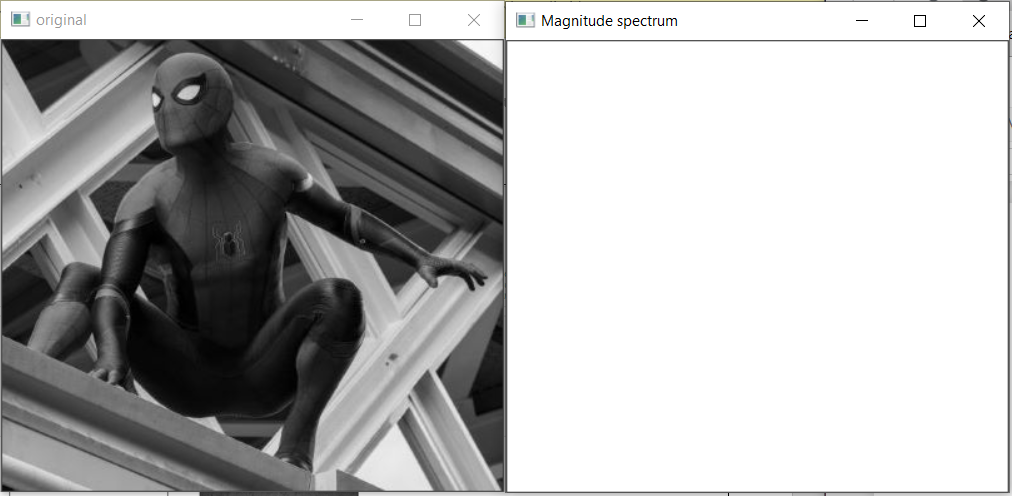

In [9]:
rows, cols = org.shape
crow,ccol = int(rows//2), int(cols//2)
mask=np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30]=0

In [14]:
fshift=dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

cv.imshow("original", org)
cv.imshow("Result", img_back)
cv.waitKey(0) 
cv.destroyAllWindows()

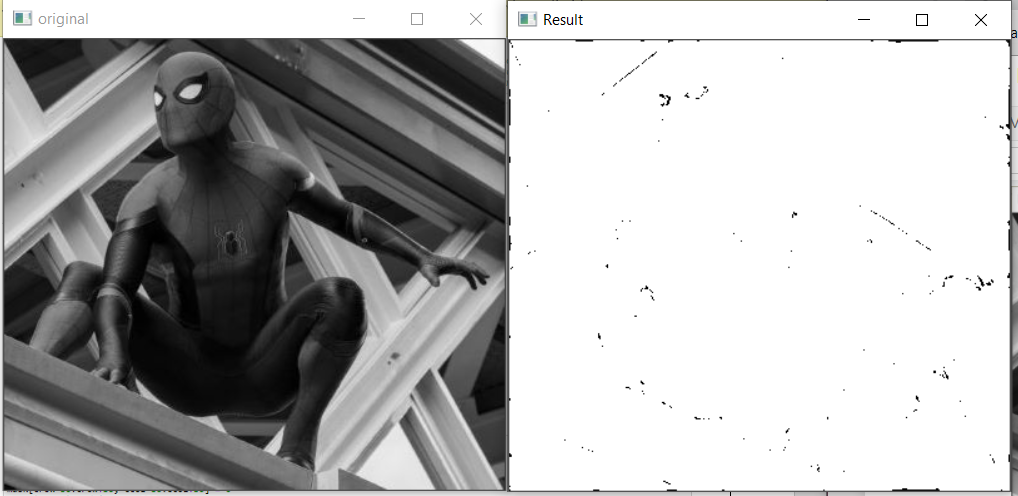